# **Лабораторная работа №4**
**Чаплин Виталий (гр.5130901/10202)**

# Упражнение 4.1

In [44]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

Рассмотрим несколько естественных источников шума и вычислим их спектр

Начнем с шума моря

In [46]:
if not os.path.exists('132736__ciccarelli__ocean-waves.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/132736__ciccarelli__ocean-waves.wav

--2024-03-18 17:02:43--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/132736__ciccarelli__ocean-waves.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/132736__ciccarelli__ocean-waves.wav [following]
--2024-03-18 17:02:43--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/132736__ciccarelli__ocean-waves.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14286332 (14M) [application/octet-stream]
Saving to: ‘132736__ciccarelli__ocean-waves.wav’

132736__ciccarelli_ 100%[===================>]  13.62M  --.-KB/s    in 0.04s   

2024-03

In [47]:
from thinkdsp import read_wave

wave = read_wave('132736__ciccarelli__ocean-waves.wav')
wave.make_audio()

Output hidden; open in https://colab.research.google.com to view.

Выберем небольшой сегмент и рассмотрим спектр

In [50]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

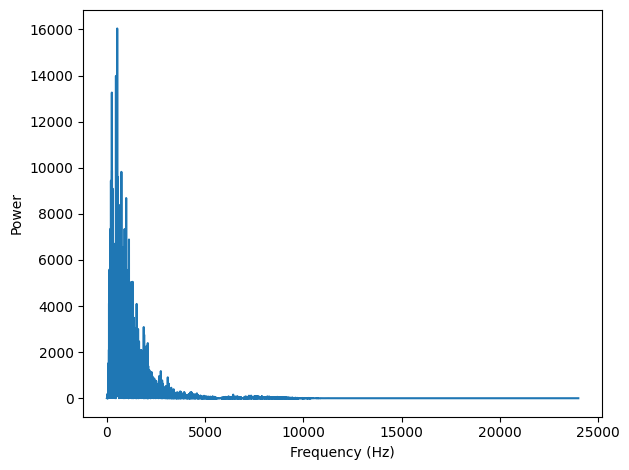

In [51]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Амплитуда уменьшается с увеличением частоты, так что это может быть розовый шум. Взглянем на спектр мощности в логарифмическом масштабе.

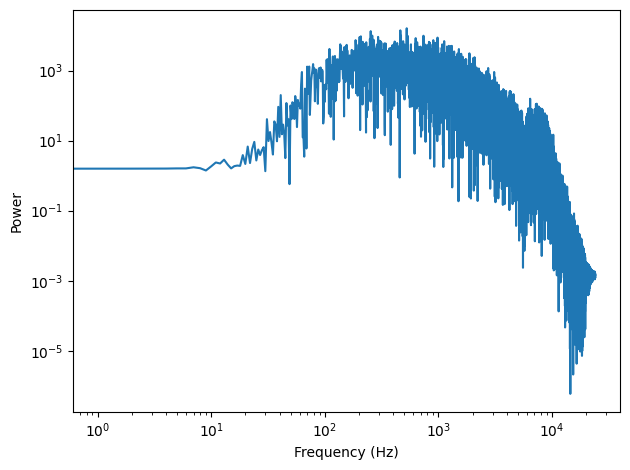

In [52]:
spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

График сначала возрастает, а потом снова уменьшается. Очень похоже, что график падает линейно, но об этом нельзя сказать точно.

Чтобы увидеть, как меняется спектр с течением времени, рассмотрим другой сегмент:

In [47]:
segment2 = wave.segment(start=2.5, duration=1.0)
segment2.make_audio()

Рассмотрим оба спектра

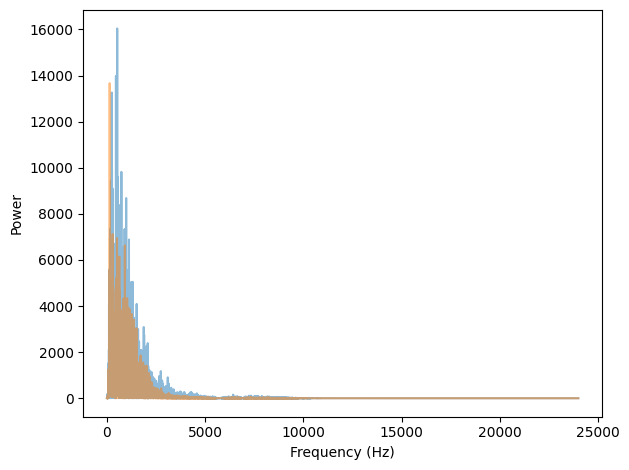

In [48]:
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

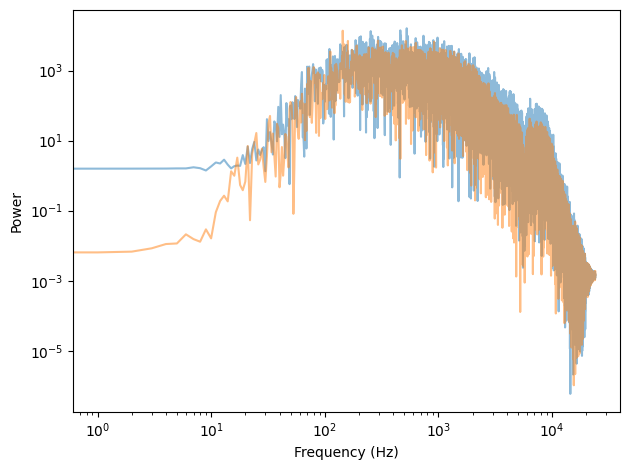

In [49]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Скорее всего структура остается неизменной с течением времени.

Теперь исследуем шум толпы

In [51]:
if not os.path.exists('180929__docquesting__crowd-noise.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180929__docquesting__crowd-noise.wav

In [52]:
from thinkdsp import read_wave

wave = read_wave('180929__docquesting__crowd-noise.wav')
wave.make_audio()

Output hidden; open in https://colab.research.google.com to view.

Выполним такие же действия

In [53]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

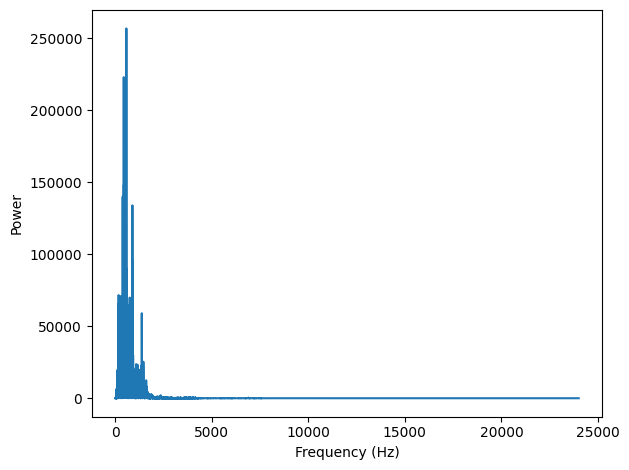

In [54]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Полученный график похож на полученный из предыдущего примера. Но зависимость падения менее похожа на линейную.

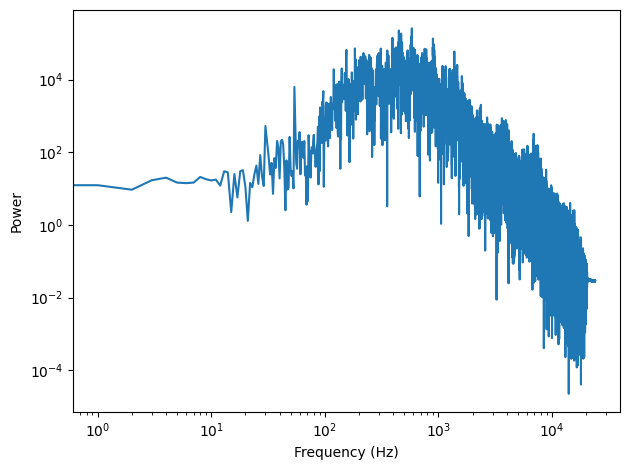

In [55]:
spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

График также сначала возрастает, а потом снова уменьшается. Очень похоже, что график падает линейно, но об этом нельзя сказать точно.

In [57]:
segment2 = wave.segment(start=2.5, duration=1.0)
segment2.make_audio()

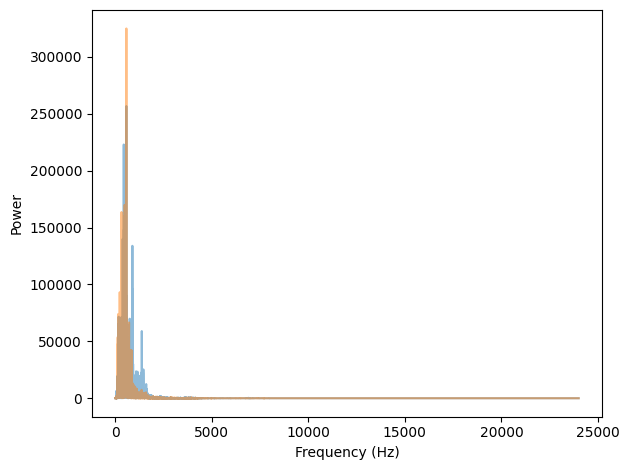

In [58]:
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

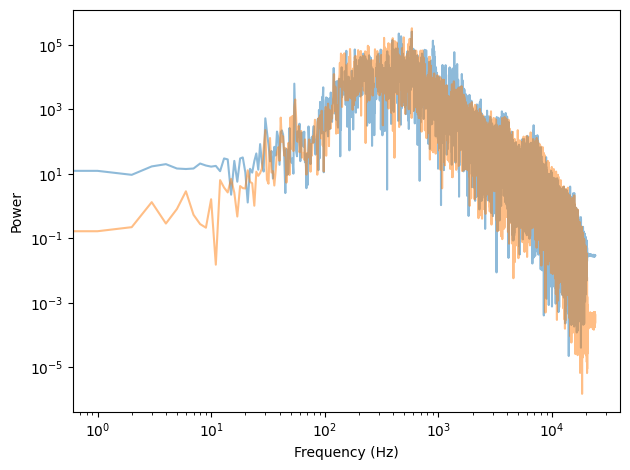

In [59]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Скорее всего структура остается неизменной с течением времени.

# Упражнение 4.2

Реализуем метод Бартлетта

In [39]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()

    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]

    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

bartlett_method создает спектрограмму и извлекает spec_map, которая сопоставляет времена с объектами спектра. Он вычисляет PSD для каждого спектра, суммирует их и помещает результаты в объект спектра.

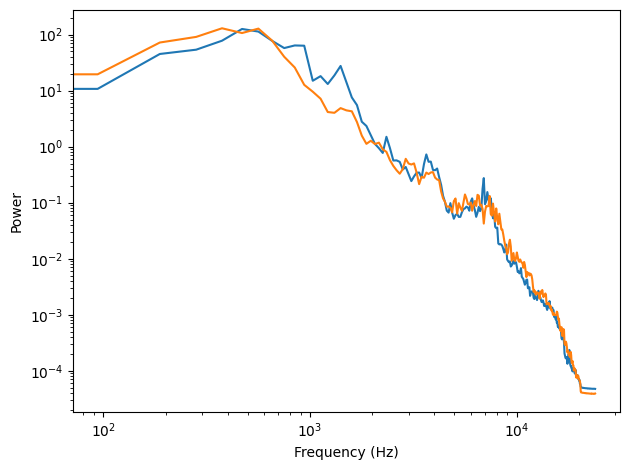

In [60]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Теперь мы можем более четко видеть взаимосвязь между мощностью и частотой. Это не простая линейная зависимость, но она постоянна в разных сегментах.

# Упражнение 4.3

Скачаем исторические данные о ежедневной цене BitCoin

In [61]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

--2024-03-18 12:43:55--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv [following]
--2024-03-18 12:43:55--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143622 (140K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 140.26K  --.-KB/s    in 0.

In [62]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv',
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


In [63]:
ys = df['Closing Price (USD)']
ts = df.index

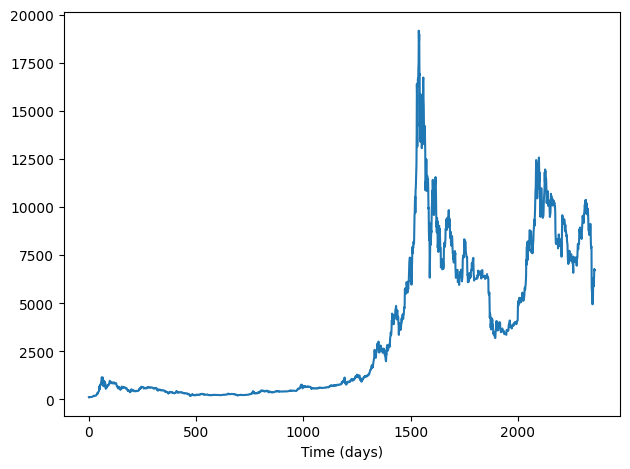

In [64]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

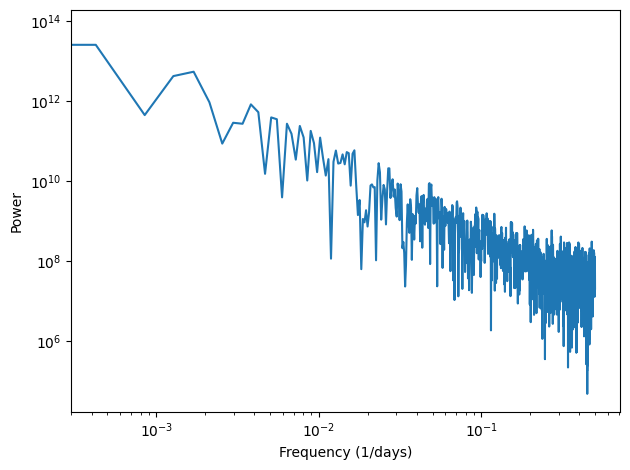

In [65]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power',
         **loglog)

In [66]:
spectrum.estimate_slope()[0]

-1.7332540936758951

Красный шум должен иметь наклон -2. Наклон этого PSD близок к -1,7, поэтому скорее всего следует считать его красным шумом.

# Упражнение 4.4

Напишем класс UncorrelatedPoissonNoise, наследующий _Noise и представляющий evaluate

In [67]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

Вот как это звучит при низких уровнях "радиации":

In [68]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

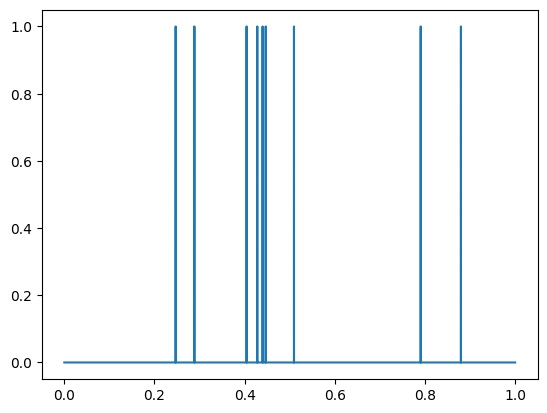

In [69]:
wave.plot()

Спектр мощности в логарифмической шкале:

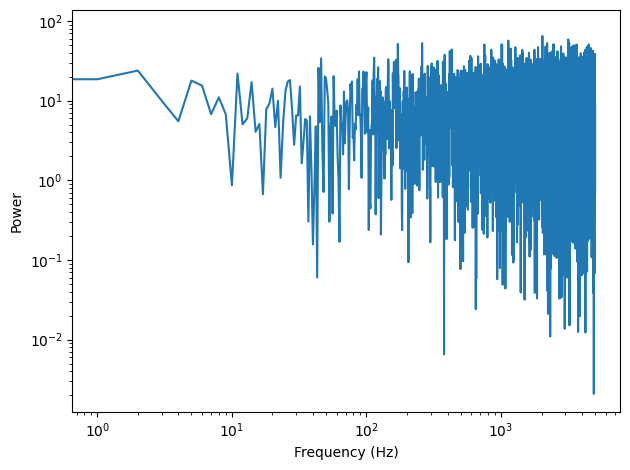

In [70]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [71]:
spectrum.estimate_slope().slope

-0.003133048723436017

Выглядит как белый шум, т.к. коэф. наклона близок к 0.

Теперь создадим такой же сигнал, но с большей амплитудой

In [72]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

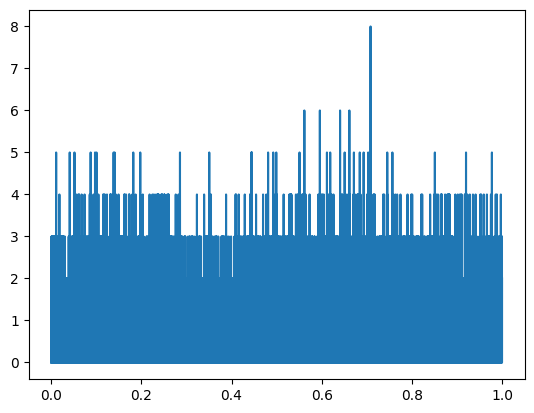

In [73]:
wave.plot()

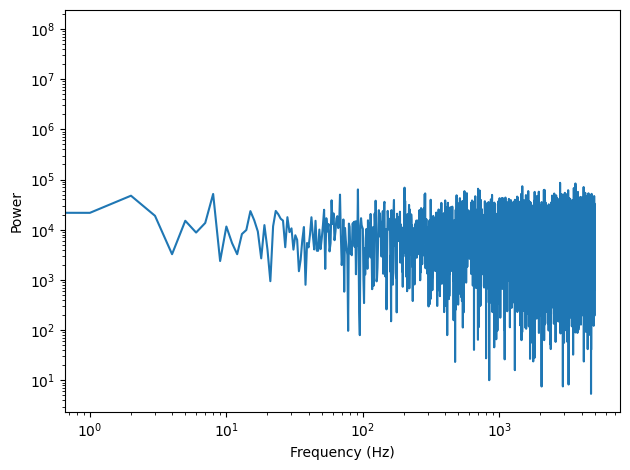

In [74]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

# Упражнение 4.5

Основная идея алгоритма Фосса-Маккартни заключается в суммировании нескольких последовательностей случайных чисел, которые обновляются с разной частотой дискретизации. Первый источник должен обновляться на каждом временном шаге; второй источник - на каждом втором временном шаге, третий источник - на каждом четвертом шаге и так далее.


In [55]:
# Генерирует розовый шум с использованием алгоритма Фосса-Маккартни
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

Сгенерируем 50000 значений

In [78]:
ys = voss(50000)
ys

array([9.6818033 , 9.43615312, 9.00408329, ..., 7.12373921, 6.47170072,
       7.78079686])

In [79]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

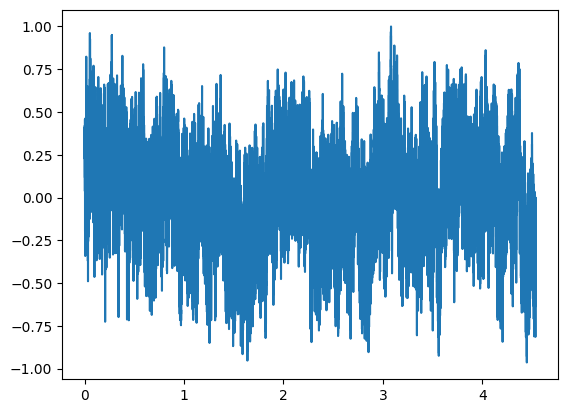

In [80]:
wave.plot()

In [81]:
wave.make_audio()

Отобразим спектр мощности

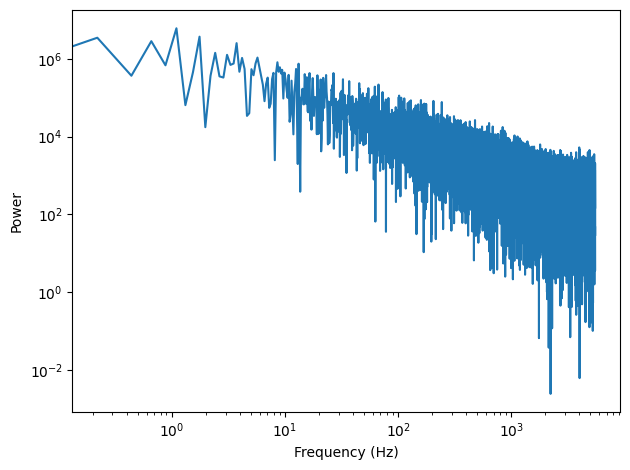

In [82]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Коэф. наклона близок к -1

In [83]:
spectrum.estimate_slope().slope

-1.0105471079437907

Мы можем получить лучшее представление о спектре средней мощности, сгенерировав более длинную выборку. Тогда график спектра мощности будет близок к прямой линии, с некоторой кривизной на самых высоких частотах, а коэф. наклона ближе к -1.